# Regression problem

In [ ]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from sklearn import preprocessing

# Data preprocessing

In [103]:
# loading data
data = pd.read_csv("compresive_strength_concrete.csv")
print(data.shape)
data.head()

(1030, 9)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [120]:
# shuffling data
data = data.sample(frac=1)

In [121]:
feature = data.iloc[:,:8].values
label = data.iloc[:,8:].values
# normalizing
mean = feature.mean(axis=0)
feature -= mean
std = label.std(axis=0)
label /= std

x_train = feature[:600]
y_train = label[:600]
x_test = feature[600:950]
y_test = label[600:950]
x_val = feature[950:]
y_val = label[950:]

# K-Fold cross validation

In [122]:
k = 4
num_samples = len(feature)//k
scores = []

for i in range(k):
    print("processing fold : ",i)
    val_x  = feature[i*num_samples:(i+1)*num_samples]
    val_y  = label[i*num_samples:(i+1)*num_samples]
    train_x  = np.concatenate([feature[:i*num_samples],feature[(i+1)*num_samples:]],axis=0)
    train_y  = np.concatenate([label[:i*num_samples],label[(i+1)*num_samples:]],axis=0)
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(512, activation='relu', input_shape=(8,)),# input shape required
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
    ])
    
    
    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    history = model.fit(train_x,train_y, epochs=25, batch_size=44 ,validation_data=(val_x,val_y))
    loss,mae = model.evaluate(val_x,val_y, verbose=2)
    scores.append(mae)
    


processing fold :  0
Train on 773 samples, validate on 257 samples
Epoch 1/25
773/773 [==============================] - 2s 2ms/sample - loss: 31.5869 - mae: 2.5878 - val_loss: 4.6955 - val_mae: 1.6816
Epoch 2/25
773/773 [==============================] - 0s 233us/sample - loss: 1.2967 - mae: 0.8282 - val_loss: 1.2025 - val_mae: 0.8098
Epoch 3/25
773/773 [==============================] - 0s 241us/sample - loss: 2.1073 - mae: 1.0952 - val_loss: 0.8278 - val_mae: 0.7229
Epoch 4/25
773/773 [==============================] - 0s 233us/sample - loss: 1.2959 - mae: 0.8227 - val_loss: 0.6164 - val_mae: 0.5604
Epoch 5/25
773/773 [==============================] - 0s 237us/sample - loss: 0.8719 - mae: 0.6939 - val_loss: 0.6804 - val_mae: 0.6373
Epoch 6/25
773/773 [==============================] - 0s 265us/sample - loss: 0.9135 - mae: 0.7049 - val_loss: 0.7188 - val_mae: 0.6511
Epoch 7/25
773/773 [==============================] - 0s 235us/sample - loss: 0.6231 - mae: 0.6144 - val_loss: 0.7792 

Epoch 9/25
773/773 [==============================] - 0s 238us/sample - loss: 1.0322 - mae: 0.7760 - val_loss: 0.9990 - val_mae: 0.7776
Epoch 10/25
773/773 [==============================] - 0s 216us/sample - loss: 0.6872 - mae: 0.6454 - val_loss: 1.1300 - val_mae: 0.8498
Epoch 11/25
773/773 [==============================] - 0s 217us/sample - loss: 0.8736 - mae: 0.7065 - val_loss: 1.1953 - val_mae: 0.7580
Epoch 12/25
773/773 [==============================] - 0s 216us/sample - loss: 0.6862 - mae: 0.6519 - val_loss: 0.6154 - val_mae: 0.5707
Epoch 13/25
773/773 [==============================] - 0s 215us/sample - loss: 0.5993 - mae: 0.6025 - val_loss: 0.6395 - val_mae: 0.6024
Epoch 14/25
773/773 [==============================] - 0s 196us/sample - loss: 0.4656 - mae: 0.5288 - val_loss: 0.7404 - val_mae: 0.6929
Epoch 15/25
773/773 [==============================] - 0s 214us/sample - loss: 0.4910 - mae: 0.5465 - val_loss: 0.5696 - val_mae: 0.5939
Epoch 16/25
773/773 [=====================

In [123]:
# mean score of mae
print(np.mean(scores))
mae = history.history["mae"]
val_mae = history.history["val_mae"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]




0.50207895


# Graphical analysis

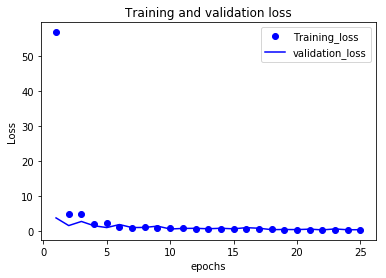

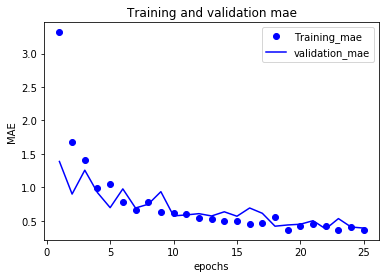

In [124]:
import matplotlib.pyplot as plt
# for loss
 
epochs = range(1, len(mae)+1)
plt.plot(epochs,loss,"bo",label = "Training_loss")
plt.plot(epochs,val_loss,"b",label = "validation_loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

# for mae
 
epochs = range(1, len(mae)+1)
plt.plot(epochs,mae,"bo",label = "Training_mae")
plt.plot(epochs,val_mae,"b",label = "validation_mae")
plt.xlabel("epochs")
plt.ylabel("MAE")
plt.title("Training and validation mae")
plt.legend()
plt.show()

# Evaluation on test data

In [125]:
loss , mae = model.evaluate(x_test,  y_test, verbose=2)

350/1 - 0s - loss: 0.2276 - mae: 0.3597


# Prediction on test data

In [137]:
m=model.predict(x_test[1:2])
print(f"predicted :{np.round(m,decimals=0)}")
print(f"Actual : {np.round(y_test[1:2],decimals=0)}")

predicted :[[1.]]
Actual : [[1.]]
